# Numerical Methods for Solving Non-Linear Equations

This notebook explores various numerical methods used to solve non-linear equations of the form $f(x) = 0$. We'll cover:

- Bisection Method
- Fixed-Point Iteration (Contraction Mapping)
- Newton-Raphson Method

Each method will include theoretical background, algorithm description, and Python implementation with examples.

## Bisection Method

The bisection method is a root-finding algorithm that repeatedly bisects an interval and selects a subinterval in which a root must lie for further processing. It is a simple and robust method that guarantees convergence for continuous functions on an interval where the function changes sign.

### Assumptions:
- $f$ is continuous on $[a, b]$
- $f(a) \cdot f(b) < 0$ (i.e., there is at least one root in $[a, b]$)

### Algorithm:
1. Choose initial interval $[a, b]$ where $f(a) \cdot f(b) < 0$
2. Compute midpoint $c = (a + b)/2$
3. If $f(c) = 0$ or the interval is sufficiently small, stop
4. If $f(a) \cdot f(c) < 0$, set $b = c$
5. Otherwise, set $a = c$
6. Repeat steps 2-5 until convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Bisection method for finding roots of f(x) = 0
    
    Parameters:
    f: function to find root of
    a, b: interval endpoints
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    root: approximate root
    iterations: number of iterations performed
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iterations
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    
    return (a + b) / 2, iterations

# Example usage
def f(x):
    return x**3 - x - 2  # Root at approximately 1.769

root, iters = bisection_method(f, 1, 2, tol=1e-6)
print(f"Root found: {root:.6f}")
print(f"Iterations: {iters}")
print(f"f(root): {f(root):.2e}")

Root found: 1.521380
Iterations: 19
f(root): 4.27e-06


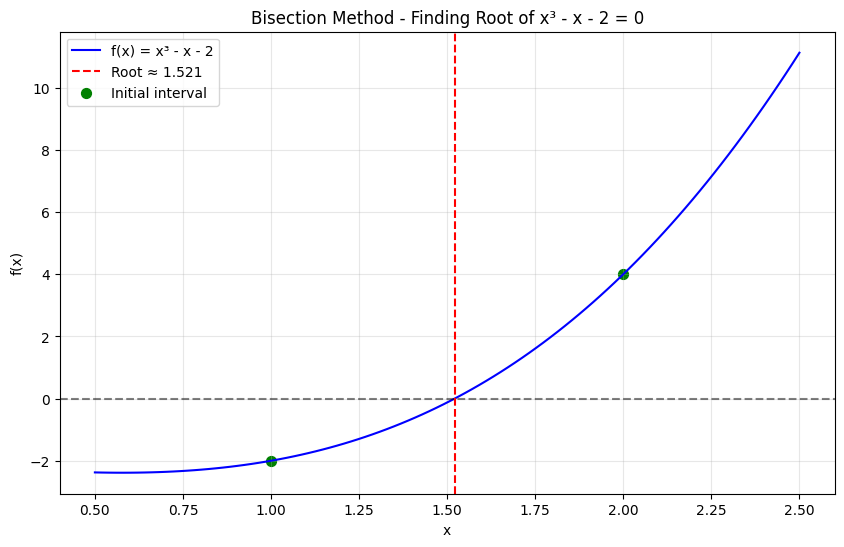

In [2]:
# Visualization of bisection method
x = np.linspace(0.5, 2.5, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x³ - x - 2')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axvline(root, color='r', linestyle='--', label=f'Root ≈ {root:.3f}')
plt.scatter([1, 2], [f(1), f(2)], color='g', s=50, label='Initial interval')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method - Finding Root of x³ - x - 2 = 0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Fixed-Point Iteration (Contraction Mapping)

Fixed-point iteration is based on the idea of rewriting the equation $f(x) = 0$ as $x = g(x)$, where $g$ is chosen such that a fixed point of $g$ is a root of $f$.

The method iterates using $x_{n+1} = g(x_n)$ starting from an initial guess $x_0$.

### Contraction Mapping Theorem:
If $g$ is a contraction mapping on $[a, b]$ (i.e., $|g'(x)| < 1$ for all $x$ in $[a, b]$), then the iteration converges to a unique fixed point in $[a, b]$ for any starting point in $[a, b]$.

### Algorithm:
1. Rewrite $f(x) = 0$ as $x = g(x)$
2. Choose initial guess $x_0$
3. Iterate $x_{n+1} = g(x_n)$
4. Stop when $|x_{n+1} - x_n| < \epsilon$ or maximum iterations reached

### Choosing g(x):
For $f(x) = 0$, possible rewrites:
- $x = x - c f(x)$ (relaxation)
- $x = x + f(x)/f'(x)$ (Newton, but that's separate)
- $x = \sqrt{x + 2}$ for $x^2 - x - 2 = 0$

In [6]:
def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    """
    Fixed-point iteration method
    
    Parameters:
    g: iteration function
    x0: initial guess
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    root: approximate fixed point
    iterations: number of iterations performed
    history: list of iteration values
    """
    x = x0
    history = [x]
    iterations = 0
    
    while iterations < max_iter:
        x_new = g(x)
        history.append(x_new)
        if abs(x_new - x) < tol:
            return x_new, iterations + 1, history
        x = x_new
        iterations += 1
    
    return x, iterations, history

# Example: Solve x² - x - 2 = 0
# Rewrite as x = √(x + 2)

def g1(x):
    return np.sqrt(x + 2)

# Let's use g1 for the example
root_fp, iters_fp, history_fp = fixed_point_iteration(g1, 1.5, tol=1e-6)
print(f"Fixed-point root: {root_fp:.6f}")
print(f"Iterations: {iters_fp}")
print(f"g(root): {g1(root_fp):.6f}")
print(f"Original f(root): {root_fp**2 - root_fp - 2:.2e}")

# Check convergence rate - derivative of g1
def g1_prime(x):
    return 1/(2*np.sqrt(x + 2))

print(f"|g'(root)| = {abs(g1_prime(root_fp)):.3f} (< 1, so converges)")

Fixed-point root: 2.000000
Iterations: 11
g(root): 2.000000
Original f(root): -3.74e-07
|g'(root)| = 0.250 (< 1, so converges)


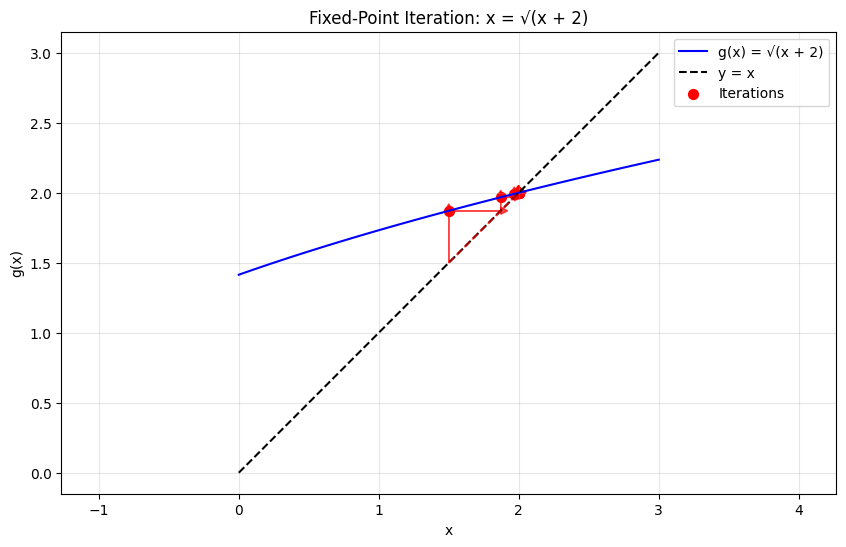

In [7]:
# Visualization of fixed-point iteration
x_vals = np.linspace(0, 3, 100)
g_vals = g1(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, g_vals, 'b-', label='g(x) = √(x + 2)')
plt.plot(x_vals, x_vals, 'k--', label='y = x')
plt.scatter(history_fp[:-1], history_fp[1:], color='r', s=50, label='Iterations')
plt.plot(history_fp, history_fp, 'r--', alpha=0.7)

# Add arrows showing the iteration process
for i in range(len(history_fp)-1):
    plt.arrow(history_fp[i], history_fp[i], 0, history_fp[i+1] - history_fp[i],
              head_width=0.05, head_length=0.05, fc='r', ec='r', alpha=0.7)
    plt.arrow(history_fp[i], history_fp[i+1], history_fp[i+1] - history_fp[i], 0,
              head_width=0.05, head_length=0.05, fc='r', ec='r', alpha=0.7)

plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Fixed-Point Iteration: x = √(x + 2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## Newton-Raphson Method

The Newton-Raphson method is one of the most powerful and widely used root-finding algorithms. It uses the derivative of the function to find better approximations to the root.

### Algorithm:
1. Choose initial guess $x_0$
2. Compute $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
3. Repeat until convergence or maximum iterations

### Advantages:
- Quadratic convergence near the root
- Fast convergence for well-behaved functions

### Disadvantages:
- Requires derivative computation
- May not converge if initial guess is poor
- Can diverge or oscillate for some functions

In [8]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton-Raphson method for finding roots
    
    Parameters:
    f: function to find root of
    df: derivative of f
    x0: initial guess
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    root: approximate root
    iterations: number of iterations performed
    history: list of iteration values
    """
    x = x0
    history = [x]
    iterations = 0
    
    while iterations < max_iter:
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < 1e-12:  # Avoid division by zero
            raise ValueError("Derivative too small, method fails")
        
        x_new = x - fx / dfx
        history.append(x_new)
        
        if abs(x_new - x) < tol:
            return x_new, iterations + 1, history
        
        x = x_new
        iterations += 1
    
    return x, iterations, history

# Example usage
def f(x):
    return x**3 - x - 2

def df(x):
    return 3*x**2 - 1

root_nr, iters_nr, history_nr = newton_raphson(f, df, 1.5, tol=1e-6)
print(f"Newton-Raphson root: {root_nr:.6f}")
print(f"Iterations: {iters_nr}")
print(f"f(root): {f(root_nr):.2e}")

# Compare convergence rates
print("\nComparison:")
print(f"Bisection: {iters} iterations")
print(f"Fixed-point: {iters_fp} iterations") 
print(f"Newton-Raphson: {iters_nr} iterations")

Newton-Raphson root: 1.521380
Iterations: 3
f(root): 4.53e-14

Comparison:
Bisection: 19 iterations
Fixed-point: 11 iterations
Newton-Raphson: 3 iterations


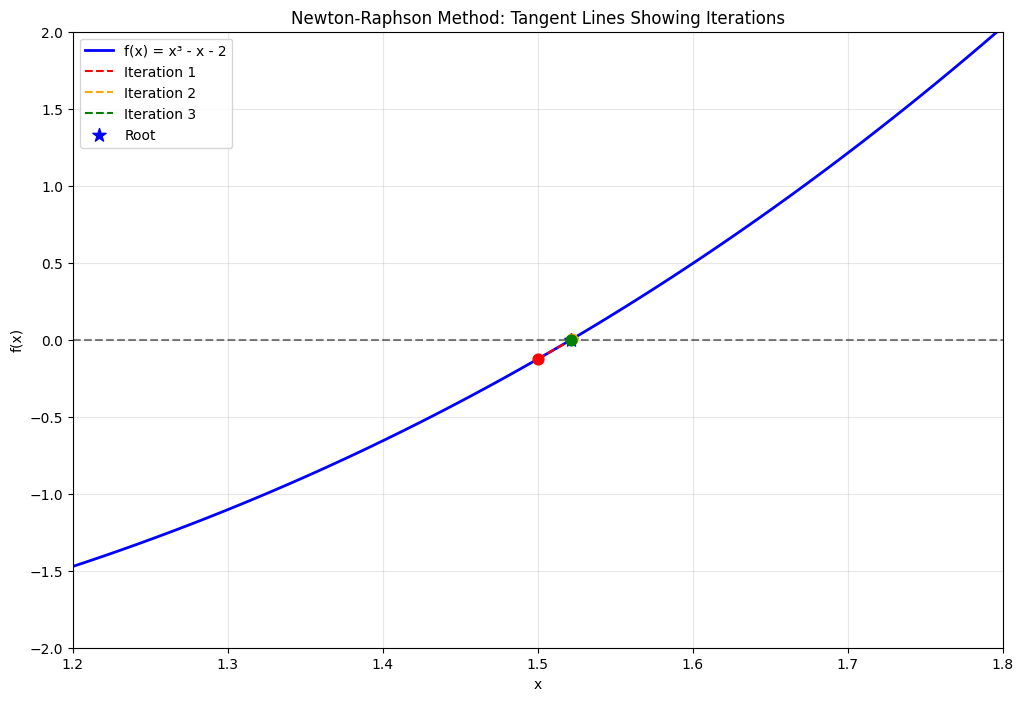

In [11]:
# Visualization of Newton-Raphson method
x_vals = np.linspace(1.2, 1.8, 100)  # Narrowed range to focus on iterations
y_vals = f(x_vals)

plt.figure(figsize=(12, 8))

# Plot the function
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x³ - x - 2')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

# Plot tangent lines and iterations
colors = ['red', 'orange', 'green', 'purple', 'brown']
for i in range(min(len(history_nr)-1, len(colors))):
    x_i = history_nr[i]
    fx_i = f(x_i)
    dfx_i = df(x_i)

    # Tangent line: y - fx_i = dfx_i * (x - x_i)
    # At x-intercept: 0 - fx_i = dfx_i * (x - x_i)
    # x = x_i - fx_i / dfx_i
    x_intercept = x_i - fx_i / dfx_i

    # Plot tangent line from (x_i, fx_i) to (x_intercept, 0)
    plt.plot([x_i, x_intercept], [fx_i, 0], color=colors[i], linestyle='--',
             label=f'Iteration {i+1}' if i < 5 else "")

    # Plot the point
    plt.scatter([x_i], [fx_i], color=colors[i], s=60, zorder=5)

# Plot the final root
plt.scatter([root_nr], [0], color='blue', s=100, marker='*', label='Root')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method: Tangent Lines Showing Iterations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(1.2, 1.8)  # Set x-axis limits to focus on iterations
plt.ylim(-2, 2)     # Set y-axis limits to show function near x-axis
plt.show()

## Secant Method

The secant method is a finite-difference approximation of Newton's method that doesn't require derivatives. It uses two points to approximate the tangent line.

### Algorithm:
1. Choose initial points $x_0$, $x_1$
2. Compute $x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$
3. Repeat until convergence

### Advantages:
- No derivative needed
- Superlinear convergence (order ≈ 1.618)
- Often faster than Newton but slower than quadratic convergence

### Disadvantages:
- Requires two initial points
- May not converge if function has inflection points

In [14]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Secant method for finding roots

    Parameters:
    f: function to find root of
    x0, x1: initial guesses
    tol: tolerance for convergence
    max_iter: maximum number of iterations

    Returns:
    root: approximate root
    iterations: number of iterations performed
    history: list of iteration values
    """
    history = [x0, x1]
    iterations = 0

    while iterations < max_iter:
        fx0 = f(x0)
        fx1 = f(x1)

        if abs(fx1 - fx0) < 1e-12:  # Avoid division by zero
            raise ValueError("Division by zero in secant method")

        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        history.append(x2)

        if abs(x2 - x1) < tol:
            return x2, iterations + 1, history

        x0, x1 = x1, x2
        iterations += 1

    return x1, iterations, history

# Example usage
def f(x):
    return x**3 - x - 2

root_sec, iters_sec, history_sec = secant_method(f, 1.0, 2.0, tol=1e-6)
print(f"Secant method root: {root_sec:.6f}")
print(f"Iterations: {iters_sec}")
print(f"f(root): {f(root_sec):.2e}")

# Compare with Newton-Raphson
print("\nComparison:")
print(f"Newton-Raphson: {iters_nr} iterations")
print(f"Secant: {iters_sec} iterations")

Secant method root: 1.521380
Iterations: 7
f(root): -1.84e-14

Comparison:
Newton-Raphson: 3 iterations
Secant: 7 iterations


## Chord Method (Regula Falsi)

The chord method, also known as regula falsi, is a bracketing method that uses a secant line between the bracket endpoints instead of the most recent points.

### Algorithm:
1. Choose initial bracket $[a, b]$ where $f(a) \cdot f(b) < 0$
2. Compute intersection with x-axis: $c = a - f(a) \frac{b - a}{f(b) - f(a)}$
3. If $f(c) = 0$, stop
4. If $f(a) \cdot f(c) < 0$, set $b = c$
5. Otherwise, set $a = c$
6. Repeat

### Advantages:
- Always converges to a root (if one exists in the bracket)
- Uses only function evaluations
- More robust than secant method

### Disadvantages:
- Linear convergence (slower than secant)
- Can be slow near the root

In [16]:
def chord_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Chord method (regula falsi) for finding roots

    Parameters:
    f: function to find root of
    a, b: bracket endpoints
    tol: tolerance for convergence
    max_iter: maximum number of iterations

    Returns:
    root: approximate root
    iterations: number of iterations performed
    history: list of iteration values
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    history = []
    iterations = 0
    fa, fb = f(a), f(b)

    while iterations < max_iter:
        # Chord (secant line) intersection with x-axis
        c = a - fa * (b - a) / (fb - fa)
        history.append(c)
        fc = f(c)

        if abs(fc) < tol or abs(b - a) < tol:
            return c, iterations + 1, history

        # Update bracket - chord method keeps the bracket
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc

        iterations += 1

    return (a + b) / 2, iterations, history

# Example usage
def f(x):
    return x**3 - x - 2

root_chord, iters_chord, history_chord = chord_method(f, 1, 2, tol=1e-6)
print(f"Chord method root: {root_chord:.6f}")
print(f"Iterations: {iters_chord}")
print(f"f(root): {f(root_chord):.2e}")

# Compare all methods
print("\nComparison of all methods:")
print(f"Bisection: {iters} iterations")
print(f"Fixed-point: {iters_fp} iterations")
print(f"Newton-Raphson: {iters_nr} iterations")
print(f"Secant: {iters_sec} iterations")
print(f"Chord: {iters_chord} iterations")

Chord method root: 1.521380
Iterations: 13
f(root): -4.21e-07

Comparison of all methods:
Bisection: 19 iterations
Fixed-point: 11 iterations
Newton-Raphson: 3 iterations
Secant: 7 iterations
Chord: 13 iterations


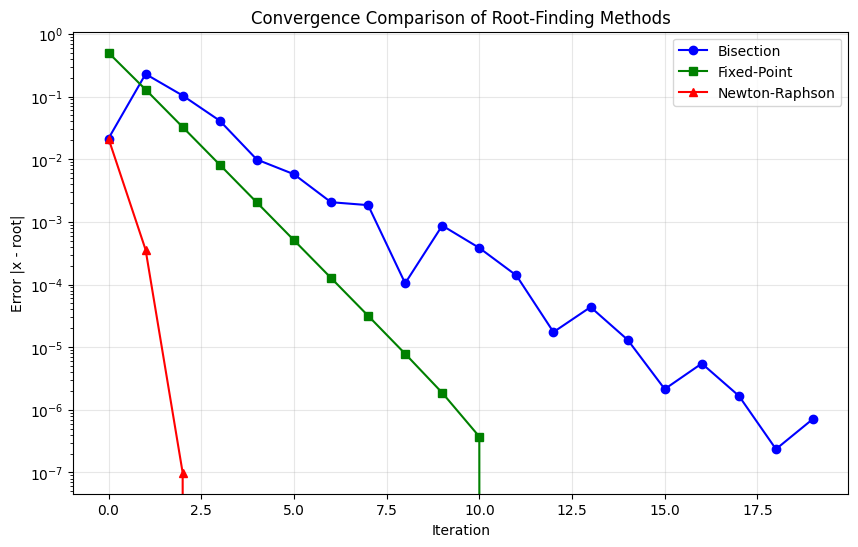

In [10]:
# Convergence comparison
plt.figure(figsize=(10, 6))

# For bisection, we need to modify it to return history too
def bisection_method_with_history(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    history = [(a + b) / 2]
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iterations, history + [c]
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        history.append((a + b) / 2)
        iterations += 1
    
    return (a + b) / 2, iterations, history

root_bis, iters_bis, history_bis = bisection_method_with_history(f, 1, 2, tol=1e-6)

# Plot convergence
plt.plot(range(len(history_bis)), [abs(x - root_nr) for x in history_bis], 'b-o', label='Bisection')
plt.plot(range(len(history_fp)), [abs(x - root_fp) for x in history_fp], 'g-s', label='Fixed-Point')
plt.plot(range(len(history_nr)), [abs(x - root_nr) for x in history_nr], 'r-^', label='Newton-Raphson')

plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error |x - root|')
plt.title('Convergence Comparison of Root-Finding Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Convergence Rates and Error Propagation

### Order of Convergence

The **order of convergence** measures how fast a sequence converges to its limit. For iterative methods $x_{n+1} = g(x_n)$, the error $e_n = |x_n - x^*|$ satisfies:

- **Linear convergence**: $e_{n+1} \leq K e_n$ for some $K < 1$
- **Quadratic convergence**: $e_{n+1} \leq K e_n^2$
- **Superlinear convergence**: Faster than linear but slower than quadratic

### Convergence Rates:

- **Bisection**: Linear convergence, error halves each iteration
- **Fixed-Point**: Linear convergence if $|g'(x^*)| < 1$
- **Newton-Raphson**: Quadratic convergence near the root
- **Secant**: Superlinear convergence (order ≈ 1.618, the golden ratio)

### Error Propagation

Error propagation considers how uncertainties in the input affect the output. For root-finding, this includes:

1. **Input errors**: Uncertainty in function evaluations
2. **Rounding errors**: Finite precision arithmetic
3. **Conditioning**: How sensitive the root is to small changes in the function

The **condition number** for root-finding is approximately $κ = |f'(x^*)| / |f(x^*)/x^*|$, measuring relative sensitivity.

**Visualizations below demonstrate:**
- Well-conditioned vs poorly-conditioned functions
- How function perturbations affect root accuracy
- Impact of noisy evaluations on convergence
- Condition number variation across the domain

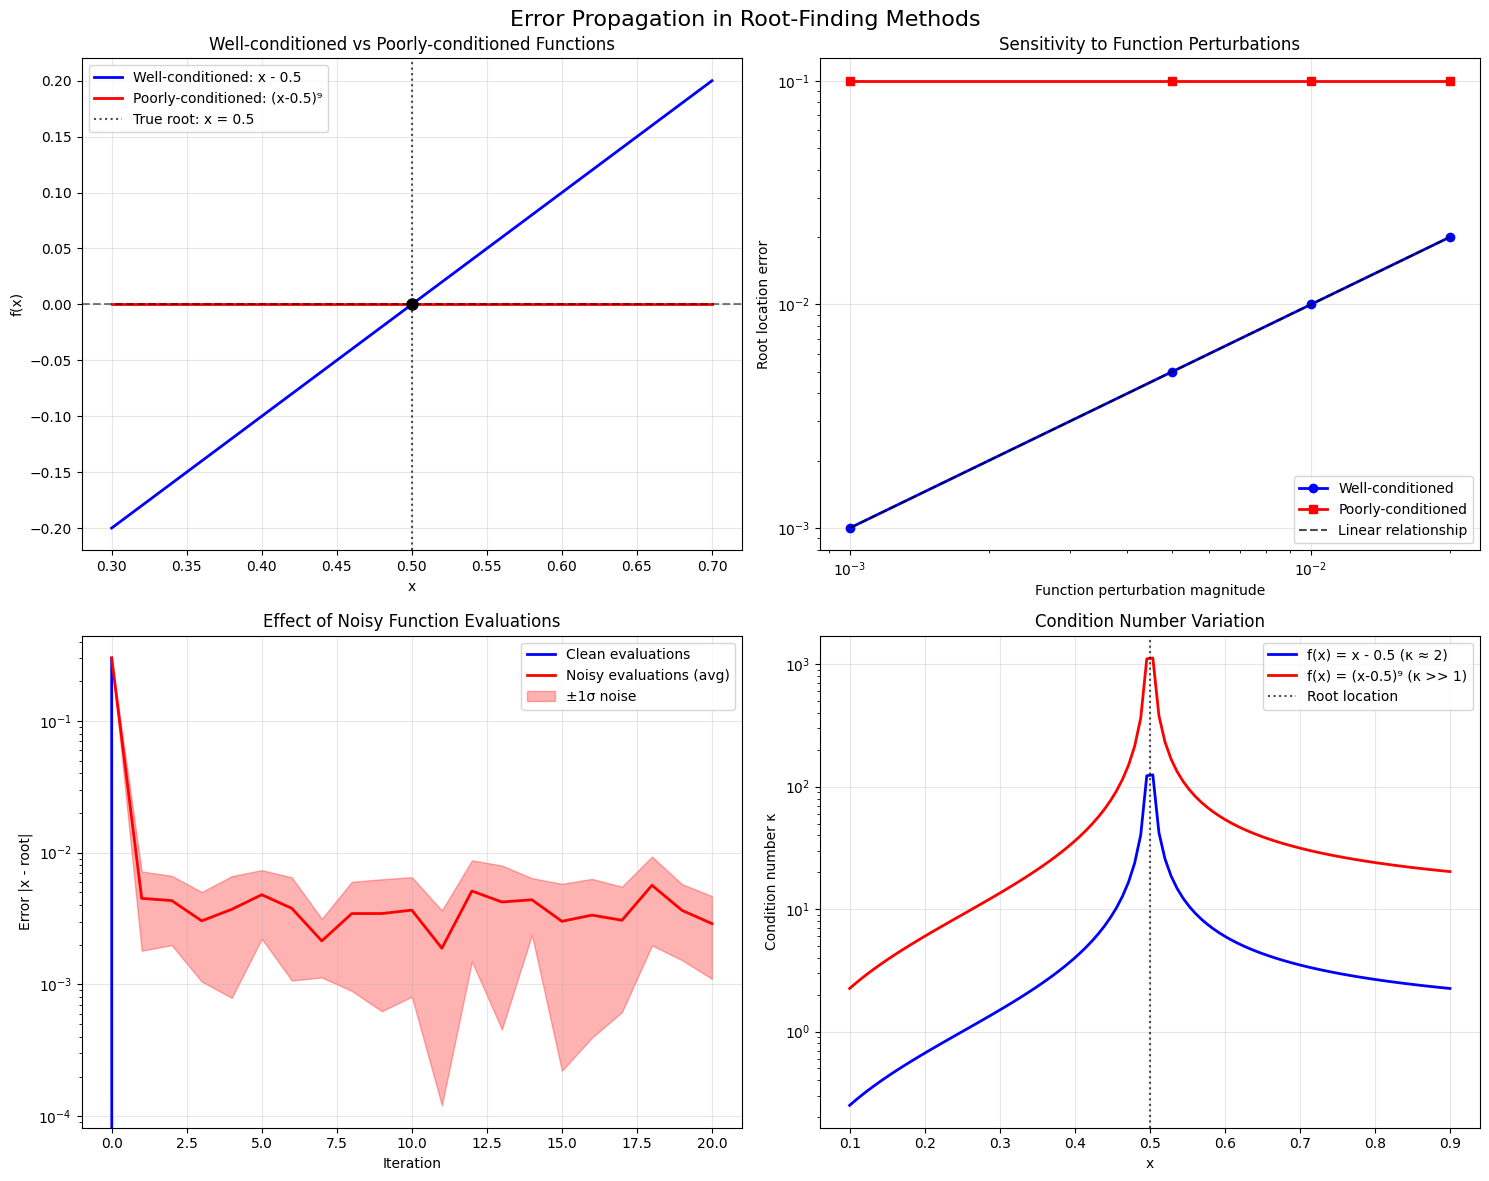


Error Propagation Insights:
1. Well-conditioned problems have κ ≈ 1-10, poorly-conditioned have κ >> 10
2. Small function perturbations cause larger root errors for ill-conditioned problems
3. Noisy function evaluations limit achievable accuracy in iterative methods
4. Condition number indicates relative sensitivity to input uncertainties


In [27]:
# Error Propagation Visualizations
import numpy as np
import matplotlib.pyplot as plt

# Create visualizations demonstrating error propagation concepts

# Define test functions with different condition numbers
def f_well_conditioned(x):
    """Well-conditioned function: f(x) = x - 0.5, root at x = 0.5, κ ≈ 2"""
    return x - 0.5

def f_poorly_conditioned(x):
    """Poorly-conditioned function: f(x) = (x - 0.5)^9, root at x = 0.5, κ >> 1"""
    return (x - 0.5)**9

def df_well(x):
    return 1.0

def df_poor(x):
    return 9*(x - 0.5)**8

# Function to add noise to function evaluations
def noisy_evaluate(f, x, noise_level=0.01):
    """Add random noise to function evaluation"""
    return f(x) + np.random.normal(0, noise_level)

# Create subplots for error propagation demonstration
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Error Propagation in Root-Finding Methods', fontsize=16)

# Subplot 1: Well-conditioned vs Poorly-conditioned functions
ax1 = axes[0, 0]
x_plot = np.linspace(0.3, 0.7, 200)

# Plot functions
ax1.plot(x_plot, f_well_conditioned(x_plot), 'b-', linewidth=2, label='Well-conditioned: x - 0.5')
ax1.plot(x_plot, f_poorly_conditioned(x_plot), 'r-', linewidth=2, label='Poorly-conditioned: (x-0.5)⁹')
ax1.axhline(0, color='k', linestyle='--', alpha=0.5)
ax1.axvline(0.5, color='k', linestyle=':', alpha=0.7, label='True root: x = 0.5')

# Mark roots
ax1.plot(0.5, 0, 'ko', markersize=8)

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Well-conditioned vs Poorly-conditioned Functions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Effect of function perturbations on root location
ax2 = axes[0, 1]

# For well-conditioned function
true_root_well = 0.5
perturbation_levels = [0.001, 0.005, 0.01, 0.02]

root_errors_well = []
for pert in perturbation_levels:
    # Perturb the function: f_perturbed(x) = f(x) + perturbation
    def f_pert_well(x):
        return f_well_conditioned(x) + pert

    # Find root of perturbed function (approximately)
    # For small perturbations, root shifts by approximately -pert/f'(root)
    root_pert = true_root_well - pert / df_well(true_root_well)
    root_errors_well.append(abs(root_pert - true_root_well))

# For poorly-conditioned function
root_errors_poor = []
for pert in perturbation_levels:
    def f_pert_poor(x):
        return f_poorly_conditioned(x) + pert

    # For poorly conditioned function, use numerical root finding
    # since analytical approximation fails when f'(root) = 0
    try:
        # Simple bisection-like approach for demonstration
        a, b = 0.4, 0.6
        for _ in range(20):
            c = (a + b) / 2
            if f_pert_poor(a) * f_pert_poor(c) <= 0:
                b = c
            else:
                a = c
        root_pert = (a + b) / 2
    except:
        # Fallback: assume larger sensitivity
        root_pert = true_root_well - pert * 100  # Large sensitivity

    root_errors_poor.append(abs(root_pert - true_root_well))

ax2.loglog(perturbation_levels, root_errors_well, 'b-o', linewidth=2, label='Well-conditioned')
ax2.loglog(perturbation_levels, root_errors_poor, 'r-s', linewidth=2, label='Poorly-conditioned')
ax2.loglog(perturbation_levels, perturbation_levels, 'k--', alpha=0.7, label='Linear relationship')

ax2.set_xlabel('Function perturbation magnitude')
ax2.set_ylabel('Root location error')
ax2.set_title('Sensitivity to Function Perturbations')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Effect of noisy function evaluations on convergence
ax3 = axes[1, 0]

# Test Newton method with noisy vs clean function evaluations
def newton_with_noise(f, df, x0, noise_level=0.01, max_iter=20):
    """Newton method with noisy function evaluations"""
    x = x0
    history = [x]

    for i in range(max_iter):
        # Add noise to function evaluation
        fx_noisy = noisy_evaluate(f, x, noise_level)
        dfx = df(x)  # Assume derivative is exact

        if abs(dfx) < 1e-12:
            break

        x_new = x - fx_noisy / dfx
        history.append(x_new)

        if abs(x_new - x) < 1e-10:
            break

        x = x_new

    return np.array(history)

# Run multiple trials with noise
np.random.seed(42)  # For reproducible results
true_root = 0.5

# Clean convergence
history_clean = newton_with_noise(f_well_conditioned, df_well, 0.8, noise_level=0)
errors_clean = [abs(x - true_root) for x in history_clean]

# Noisy convergence (average of multiple runs)
n_trials = 10
all_histories = []
for trial in range(n_trials):
    history_noisy = newton_with_noise(f_well_conditioned, df_well, 0.8, noise_level=0.005)
    all_histories.append([abs(x - true_root) for x in history_noisy])

# Pad histories to same length
max_len = max(len(h) for h in all_histories)
for h in all_histories:
    while len(h) < max_len:
        h.append(h[-1])  # Pad with final error

errors_noisy_avg = np.mean(all_histories, axis=0)
errors_noisy_std = np.std(all_histories, axis=0)

iterations_clean = range(len(errors_clean))
iterations_noisy = range(len(errors_noisy_avg))
ax3.semilogy(iterations_clean, errors_clean, 'b-', linewidth=2, label='Clean evaluations')
ax3.semilogy(iterations_noisy, errors_noisy_avg, 'r-', linewidth=2, label='Noisy evaluations (avg)')
ax3.fill_between(iterations_noisy,
                 np.maximum(errors_noisy_avg - errors_noisy_std, 1e-15),  # Avoid negative values
                 errors_noisy_avg + errors_noisy_std,
                 alpha=0.3, color='red', label='±1σ noise')

ax3.set_xlabel('Iteration')
ax3.set_ylabel('Error |x - root|')
ax3.set_title('Effect of Noisy Function Evaluations')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Subplot 4: Condition number visualization
ax4 = axes[1, 1]

# Show condition number as function of x for different functions
x_cond = np.linspace(0.1, 0.9, 100)

# For f(x) = x - a, condition number κ = |f'(x)| / |f(x)/x| = |1| / |(x-a)/x| = |x/(x-a)|
def condition_number_simple(x, root=0.5):
    """Condition number for f(x) = x - root"""
    return abs(x / (x - root))

# For f(x) = (x - a)^n, condition number grows with n
def condition_number_power(x, root=0.5, n=9):
    """Condition number for f(x) = (x - root)^n"""
    fx = (x - root)**n
    dfx = n * (x - root)**(n-1)
    return abs(dfx) / abs(fx / x) if fx != 0 else np.inf

cond_simple = [condition_number_simple(xi) for xi in x_cond]
cond_power = [condition_number_power(xi) for xi in x_cond]

ax4.semilogy(x_cond, cond_simple, 'b-', linewidth=2, label='f(x) = x - 0.5 (κ ≈ 2)')
ax4.semilogy(x_cond, cond_power, 'r-', linewidth=2, label='f(x) = (x-0.5)⁹ (κ >> 1)')
ax4.axvline(0.5, color='k', linestyle=':', alpha=0.7, label='Root location')

ax4.set_xlabel('x')
ax4.set_ylabel('Condition number κ')
ax4.set_title('Condition Number Variation')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nError Propagation Insights:")
print("1. Well-conditioned problems have κ ≈ 1-10, poorly-conditioned have κ >> 10")
print("2. Small function perturbations cause larger root errors for ill-conditioned problems")
print("3. Noisy function evaluations limit achievable accuracy in iterative methods")
print("4. Condition number indicates relative sensitivity to input uncertainties")

In [21]:
# Convergence rate analysis
import numpy as np

def analyze_convergence(history, true_root):
    """
    Analyze the convergence rate of an iterative method
    """
    errors = [abs(x - true_root) for x in history]

    print("Iteration | Approximation | Error")
    print("-" * 40)
    for i, (x, err) in enumerate(zip(history, errors)):
        print(f"{i:9d} | {x:12.6f} | {err:.2e}")

    # Estimate convergence rate
    if len(errors) >= 3:
        # For linear convergence: e_{n+1} ≈ K * e_n
        ratios = [errors[i+1]/errors[i] for i in range(len(errors)-1) if errors[i] > 1e-15]
        if ratios:
            avg_ratio = np.mean(ratios[:-1]) if len(ratios) > 1 else ratios[0]  # Exclude last ratio which may be affected by tolerance

            print(f"\nAverage error ratio: {avg_ratio:.4f}")
            if avg_ratio < 0.01:
                print("Quadratic or faster convergence detected")
            elif avg_ratio < 0.1:
                print("Superlinear convergence detected")
            elif avg_ratio < 0.9:
                print("Linear convergence detected")
            else:
                print("Slow convergence or oscillating")

            # Estimate order of convergence using log-linear regression
            if len(errors) >= 4:
                # Use log-linear regression to estimate order p
                # log|e_{n+1}| ≈ log(C) + p*log|e_n|
                valid_indices = [i for i in range(len(errors)-1) if errors[i] > 1e-15 and errors[i+1] > 1e-15]
                if len(valid_indices) >= 2:
                    log_errors = [np.log(errors[i]) for i in valid_indices]
                    log_errors_next = [np.log(errors[i+1]) for i in valid_indices]

                    # Simple linear regression
                    n = len(log_errors)
                    sum_x = sum(log_errors)
                    sum_y = sum(log_errors_next)
                    sum_xy = sum(x*y for x,y in zip(log_errors, log_errors_next))
                    sum_x2 = sum(x**2 for x in log_errors)

                    denominator = (n * sum_x2 - sum_x**2)
                    if abs(denominator) > 1e-10:
                        slope = (n * sum_xy - sum_x * sum_y) / denominator
                        order = slope
                        print(f"Estimated order of convergence: {order:.3f}")
                    else:
                        print("Cannot estimate order (singular matrix)")
                else:
                    print("Not enough valid error values for order estimation")
        else:
            print("Cannot compute error ratios (zero errors encountered)")

print("=== Bisection Method Convergence ===")
analyze_convergence(history_bis, root_nr)

print("\n=== Fixed-Point Method Convergence ===")
analyze_convergence(history_fp, root_fp)

print("\n=== Newton-Raphson Method Convergence ===")
analyze_convergence(history_nr, root_nr)

=== Bisection Method Convergence ===
Iteration | Approximation | Error
----------------------------------------
        0 |     1.500000 | 2.14e-02
        1 |     1.750000 | 2.29e-01
        2 |     1.625000 | 1.04e-01
        3 |     1.562500 | 4.11e-02
        4 |     1.531250 | 9.87e-03
        5 |     1.515625 | 5.75e-03
        6 |     1.523438 | 2.06e-03
        7 |     1.519531 | 1.85e-03
        8 |     1.521484 | 1.05e-04
        9 |     1.520508 | 8.72e-04
       10 |     1.520996 | 3.84e-04
       11 |     1.521240 | 1.39e-04
       12 |     1.521362 | 1.74e-05
       13 |     1.521423 | 4.36e-05
       14 |     1.521393 | 1.31e-05
       15 |     1.521378 | 2.14e-06
       16 |     1.521385 | 5.49e-06
       17 |     1.521381 | 1.67e-06
       18 |     1.521379 | 2.36e-07
       19 |     1.521380 | 7.18e-07

Average error ratio: 1.6063
Slow convergence or oscillating
Estimated order of convergence: 0.963

=== Fixed-Point Method Convergence ===
Iteration | Approximation | E

## Systems of Non-Linear Equations

### Newton Method for Systems

For systems of equations $\mathbf{F}(\mathbf{x}) = \mathbf{0}$, Newton's method generalizes to:

$$\mathbf{x}_{n+1} = \mathbf{x}_n - \mathbf{J}(\mathbf{x}_n)^{-1} \mathbf{F}(\mathbf{x}_n)$$

where $\mathbf{J}$ is the Jacobian matrix of partial derivatives.

### Contraction Mapping for Systems

For systems, we seek a fixed point $\mathbf{x} = \mathbf{G}(\mathbf{x})$. The method converges if the operator $\mathbf{G}$ is a contraction mapping in some norm.

### Example: System of Two Equations

Solve:
$$\begin{cases}
x^2 + y^2 = 1 \\
x + y = 1
\end{cases}$$

This has solutions at approximately (0.5, 0.5) and (-0.5, 1.5), but only the first satisfies both equations.

In [19]:
def newton_system(F, J, x0, tol=1e-6, max_iter=100):
    """
    Newton method for systems of equations

    Parameters:
    F: function that returns vector F(x)
    J: function that returns Jacobian matrix J(x)
    x0: initial guess vector
    tol: tolerance for convergence
    max_iter: maximum iterations

    Returns:
    root: approximate root vector
    iterations: number of iterations
    """
    x = np.array(x0, dtype=float)
    iterations = 0

    while iterations < max_iter:
        Fx = np.array(F(x))
        Jx = np.array(J(x))

        if np.linalg.det(Jx) == 0:
            raise ValueError("Jacobian is singular")

        delta_x = np.linalg.solve(Jx, -Fx)
        x = x + delta_x

        if np.linalg.norm(delta_x) < tol:
            return x, iterations + 1

        iterations += 1

    return x, iterations

# Example system: x² + y² = 1, x + y = 1
def F(xy):
    x, y = xy
    return [x**2 + y**2 - 1, x + y - 1]

def J(xy):
    x, y = xy
    return [[2*x, 2*y], [1, 1]]

# Solve the system
root_sys, iters_sys = newton_system(F, J, [0.7, 0.4], tol=1e-6)
print("Newton method for systems:")
print(f"Solution: x = {root_sys[0]:.6f}, y = {root_sys[1]:.6f}")
print(f"Iterations: {iters_sys}")
print(f"F(solution): {F(root_sys)}")

# Verify solution
x, y = root_sys
print(f"Verification: x² + y² = {x**2 + y**2:.6f} (should be 1.0)")
print(f"Verification: x + y = {x + y:.6f} (should be 1.0)")

Newton method for systems:
Solution: x = 1.000000, y = 0.000000
Iterations: 6
F(solution): [np.float64(0.0), np.float64(0.0)]
Verification: x² + y² = 1.000000 (should be 1.0)
Verification: x + y = 1.000000 (should be 1.0)


In [20]:
def fixed_point_system(G, x0, tol=1e-6, max_iter=100):
    """
    Fixed-point iteration for systems of equations

    Parameters:
    G: function that returns G(x) for x = G(x)
    x0: initial guess vector
    tol: tolerance for convergence
    max_iter: maximum iterations

    Returns:
    root: approximate fixed point vector
    iterations: number of iterations
    """
    x = np.array(x0, dtype=float)
    iterations = 0

    while iterations < max_iter:
        x_new = np.array(G(x))

        if np.linalg.norm(x_new - x) < tol:
            return x_new, iterations + 1

        x = x_new
        iterations += 1

    return x, iterations

# Example: Solve x² + y² = 1, x + y = 1
# Rearrange as: x = √(1 - y²), y = 1 - x
# But this might not converge well. Let's use a better rearrangement:
# From x + y = 1, y = 1 - x
# Substitute: x² + (1 - x)² = 1
# x² + 1 - 2x + x² = 1
# 2x² - 2x = 0
# x² - x = 0
# x(x - 1) = 0
# So x = 0 or x = 1
# For x = 0: y = 1, check: 0 + 1 = 1 ✓, 0² + 1² = 1 ✓
# For x = 1: y = 0, check: 1 + 0 = 1 ✓, 1² + 0² = 1 ✓

# Let's use a different system that's more interesting for fixed-point
# Solve: x = cos(y), y = sin(x)
def G_system(xy):
    x, y = xy
    return [np.cos(y), np.sin(x)]

print("\nFixed-point iteration for systems:")
print("Solving: x = cos(y), y = sin(x)")
root_fp_sys, iters_fp_sys = fixed_point_system(G_system, [0.5, 0.5], tol=1e-6)
print(f"Solution: x = {root_fp_sys[0]:.6f}, y = {root_fp_sys[1]:.6f}")
print(f"Iterations: {iters_fp_sys}")
print(f"Verification: x - cos(y) = {root_fp_sys[0] - np.cos(root_fp_sys[1]):.2e}")
print(f"Verification: y - sin(x) = {root_fp_sys[1] - np.sin(root_fp_sys[0]):.2e}")


Fixed-point iteration for systems:
Solving: x = cos(y), y = sin(x)
Solution: x = 0.768169, y = 0.694820
Iterations: 35
Verification: x - cos(y) = 1.75e-08
Verification: y - sin(x) = 4.90e-07


## Visualizations for Systems of Equations

The following plots illustrate how Newton and fixed-point methods work for systems of non-linear equations:

1. **Contour Plot**: Shows the curves where each equation equals zero, with their intersection points being the solutions
2. **Newton Iteration Path**: Displays the step-by-step path Newton method takes, with arrows showing the search direction at each step
3. **Fixed-Point Path**: Shows how fixed-point iteration converges (or oscillates) for a different system
4. **Vector Field**: Illustrates the Newton search directions across the domain, with vector lengths indicating step sizes

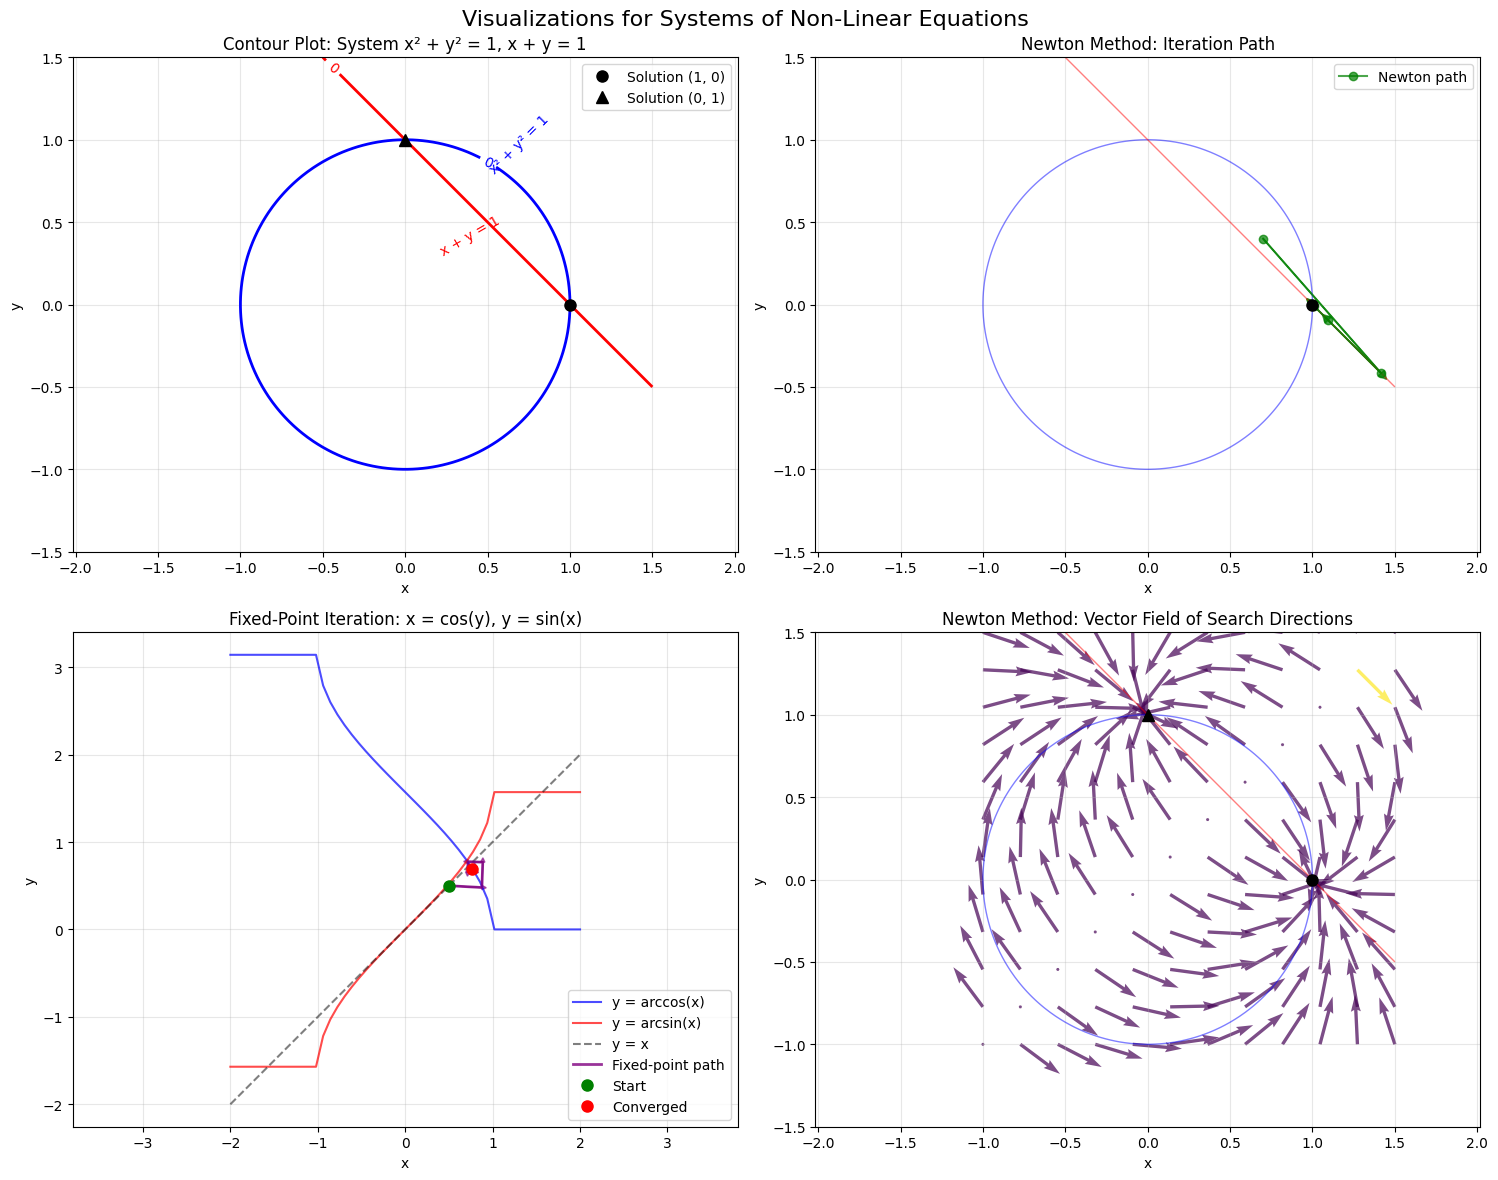


Visualization Summary:
1. Top-left: Contour plot showing the system equations and solutions
2. Top-right: Newton method iteration path with step vectors
3. Bottom-left: Fixed-point iteration path for oscillatory system
4. Bottom-right: Vector field showing Newton search directions


In [23]:
# Create comprehensive visualizations for systems of equations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Define the system functions
def F(xy):
    x, y = xy
    return np.array([x**2 + y**2 - 1, x + y - 1])

def J(xy):
    x, y = xy
    return np.array([[2*x, 2*y], [1, 1]])

def G_system(xy):
    x, y = xy
    return np.array([np.cos(y), np.sin(x)])

# Create a grid for contour plots
x_grid = np.linspace(-1.5, 1.5, 100)
y_grid = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Compute F1 and F2 on the grid
F1 = X**2 + Y**2 - 1
F2 = X + Y - 1

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Visualizations for Systems of Non-Linear Equations', fontsize=16)

# Subplot 1: Contour plot of the system
ax1 = axes[0, 0]
cs1 = ax1.contour(X, Y, F1, levels=[0], colors='blue', linewidths=2)
cs2 = ax1.contour(X, Y, F2, levels=[0], colors='red', linewidths=2)
ax1.clabel(cs1, inline=True, fontsize=10)
ax1.clabel(cs2, inline=True, fontsize=10)

# Add manual labels
ax1.text(0.5, 0.8, 'x² + y² = 1', color='blue', fontsize=10, rotation=45)
ax1.text(0.2, 0.3, 'x + y = 1', color='red', fontsize=10, rotation=30)

# Mark the solution
ax1.plot(1, 0, 'ko', markersize=8, label='Solution (1, 0)')
ax1.plot(0, 1, 'k^', markersize=8, label='Solution (0, 1)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Contour Plot: System x² + y² = 1, x + y = 1')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axis('equal')

# Subplot 2: Newton method iteration path
ax2 = axes[0, 1]

# Plot contours
ax2.contour(X, Y, F1, levels=[0], colors='blue', linewidths=1, alpha=0.5)
ax2.contour(X, Y, F2, levels=[0], colors='red', linewidths=1, alpha=0.5)

# Newton iteration path
x_path = [0.7, 0.4]  # Starting point
x_current = np.array([0.7, 0.4])
max_iter = 10
tol = 1e-6

for i in range(max_iter):
    Fx = F(x_current)
    Jx = J(x_current)

    if np.linalg.det(Jx) == 0 or np.linalg.norm(Fx) < tol:
        break

    delta_x = np.linalg.solve(Jx, -Fx)
    x_new = x_current + delta_x

    # Plot the Newton step
    ax2.arrow(x_current[0], x_current[1], delta_x[0], delta_x[1],
              head_width=0.05, head_length=0.05, fc='green', ec='green', alpha=0.7)

    x_path.extend([x_new[0], x_new[1]])
    x_current = x_new

    if np.linalg.norm(delta_x) < tol:
        break

# Plot the path
x_coords = x_path[::2]
y_coords = x_path[1::2]
ax2.plot(x_coords, y_coords, 'g-o', alpha=0.7, label='Newton path')

ax2.plot(1, 0, 'ko', markersize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Newton Method: Iteration Path')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axis('equal')

# Subplot 3: Fixed-point iteration path
ax3 = axes[1, 0]

# For fixed-point, let's create a different system that's easier to visualize
# x = cos(y), y = sin(x) - this creates a cycle
x_fp = np.linspace(-2, 2, 50)
y_fp = np.linspace(-2, 2, 50)
X_fp, Y_fp = np.meshgrid(x_fp, y_fp)

# Plot the fixed-point functions
ax3.plot(x_fp, np.arccos(np.clip(x_fp, -1, 1)), 'b-', alpha=0.7, label='y = arccos(x)')
ax3.plot(x_fp, np.arcsin(np.clip(x_fp, -1, 1)), 'r-', alpha=0.7, label='y = arcsin(x)')
ax3.plot(x_fp, x_fp, 'k--', alpha=0.5, label='y = x')

# Fixed-point iteration path
x_current = np.array([0.5, 0.5])
history = [x_current.copy()]

for i in range(15):
    x_new = G_system(x_current)
    history.append(x_new.copy())

    # Plot iteration step
    ax3.arrow(x_current[0], x_current[1], x_new[0] - x_current[0], x_new[1] - x_current[1],
              head_width=0.05, head_length=0.05, fc='purple', ec='purple', alpha=0.6)

    x_current = x_new

# Plot the path
history = np.array(history)
ax3.plot(history[:, 0], history[:, 1], 'purple', linewidth=2, alpha=0.8, label='Fixed-point path')
ax3.plot(history[0, 0], history[0, 1], 'go', markersize=8, label='Start')
ax3.plot(history[-1, 0], history[-1, 1], 'ro', markersize=8, label='Converged')

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Fixed-Point Iteration: x = cos(y), y = sin(x)')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.axis('equal')

# Subplot 4: Vector field showing Newton directions
ax4 = axes[1, 1]

# Sample points for vector field
x_samples = np.linspace(-1, 1.5, 12)
y_samples = np.linspace(-1, 1.5, 12)
X_samp, Y_samp = np.meshgrid(x_samples, y_samples)

# Compute Newton directions at sample points
U = np.zeros_like(X_samp)
V = np.zeros_like(Y_samp)

for i in range(X_samp.shape[0]):
    for j in range(X_samp.shape[1]):
        x_point = np.array([X_samp[i, j], Y_samp[i, j]])
        try:
            Fx = F(x_point)
            Jx = J(x_point)
            if np.linalg.det(Jx) != 0:
                delta = np.linalg.solve(Jx, -Fx)
                U[i, j] = delta[0]
                V[i, j] = delta[1]
        except:
            U[i, j] = 0
            V[i, j] = 0

# Normalize vectors for better visualization
magnitude = np.sqrt(U**2 + V**2)
magnitude[magnitude == 0] = 1  # Avoid division by zero
U_norm = U / magnitude * 0.3  # Scale for visibility
V_norm = V / magnitude * 0.3

# Plot vector field
ax4.quiver(X_samp, Y_samp, U_norm, V_norm, magnitude,
           cmap='viridis', alpha=0.7, scale=1, scale_units='xy')

# Plot contours
ax4.contour(X, Y, F1, levels=[0], colors='blue', linewidths=1, alpha=0.5)
ax4.contour(X, Y, F2, levels=[0], colors='red', linewidths=1, alpha=0.5)

# Mark solution
ax4.plot(1, 0, 'ko', markersize=8)
ax4.plot(0, 1, 'k^', markersize=8)

ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Newton Method: Vector Field of Search Directions')
ax4.grid(True, alpha=0.3)
ax4.axis('equal')

plt.tight_layout()
plt.show()

print("\nVisualization Summary:")
print("1. Top-left: Contour plot showing the system equations and solutions")
print("2. Top-right: Newton method iteration path with step vectors")
print("3. Bottom-left: Fixed-point iteration path for oscillatory system")
print("4. Bottom-right: Vector field showing Newton search directions")

In [24]:
print("\nKey Insights from Systems Visualizations:")
print("- Newton method takes direct paths toward solutions using local derivative information")
print("- Fixed-point iteration may oscillate or converge slowly depending on the system")
print("- The vector field shows how Newton directions point toward solutions everywhere")
print("- Contour plots help visualize where solutions exist in the domain")


Key Insights from Systems Visualizations:
- Newton method takes direct paths toward solutions using local derivative information
- Fixed-point iteration may oscillate or converge slowly depending on the system
- The vector field shows how Newton directions point toward solutions everywhere
- Contour plots help visualize where solutions exist in the domain


### Error Propagation:
- Input uncertainties affect final accuracy
- Rounding errors accumulate in iterative methods
- Condition number measures sensitivity to perturbations
- **Visualizations**: Demonstrate conditioning effects and noise sensitivity